In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#통계적 검정
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import scipy.stats
from scipy.stats import chi2_contingency

#모델 구축
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV



#성능 검증
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, roc_auc_score
from xgboost import plot_importance

pd.options.display.max_columns = None

In [63]:
df =pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [65]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [66]:
category_cols = []
numerical_cols = []
for idx, type_ in zip(df.dtypes.index, df.dtypes):
    if type_ == 'int64' or type_ == 'float64':
        numerical_cols.append(idx)
    else:
        print('{0}는 문자형'.format(idx))
        category_cols.append(idx)

customerID는 문자형
gender는 문자형
Partner는 문자형
Dependents는 문자형
PhoneService는 문자형
MultipleLines는 문자형
InternetService는 문자형
OnlineSecurity는 문자형
OnlineBackup는 문자형
DeviceProtection는 문자형
TechSupport는 문자형
StreamingTV는 문자형
StreamingMovies는 문자형
Contract는 문자형
PaperlessBilling는 문자형
PaymentMethod는 문자형
TotalCharges는 문자형
Churn는 문자형


In [67]:
for col in category_cols:
    print(col + " 카운트::")
    print(df.loc[:, col].value_counts())
    print()

customerID 카운트::
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

gender 카운트::
Male      3555
Female    3488
Name: gender, dtype: int64

Partner 카운트::
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents 카운트::
No     4933
Yes    2110
Name: Dependents, dtype: int64

PhoneService 카운트::
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines 카운트::
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService 카운트::
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity 카운트::
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

OnlineBackup 카운트::
No                     3088
Yes                    2429
No inter

In [68]:
print(numerical_cols)
print(category_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges']
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [69]:
category_cols.append('SeniorCitizen')
numerical_cols.remove('SeniorCitizen')
category_cols.remove('TotalCharges')
category_cols.remove('customerID')

In [70]:
print(numerical_cols)
print(category_cols)

['tenure', 'MonthlyCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']


In [71]:
for i in df['TotalCharges'].unique():
    if i.isnumeric():
        continue
    else:
            x=i

x


'6844.5'

In [72]:
df['TotalCharges']=df['TotalCharges'].replace('6844.5',6844.5)
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)
df['TotalCharges']=df['TotalCharges'].astype('float64')
#이후 결측치 처리 필요

In [73]:
df['TotalCharges'].value_counts

<bound method IndexOpsMixin.value_counts of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>

In [74]:
numerical_cols.append('TotalCharges')

# EDA

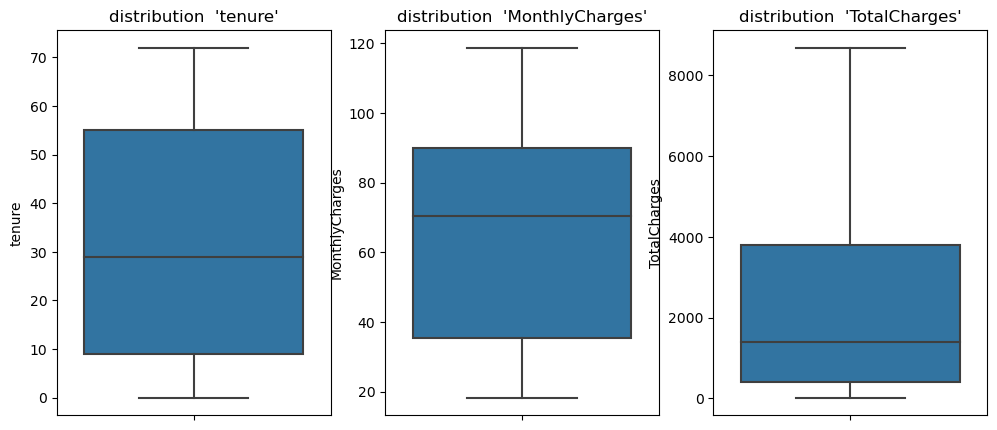

In [75]:
figure, ax_list = plt.subplots(nrows=1, ncols=3) 
figure.set_size_inches(12,5) 

for i in range(3):
    col = numerical_cols[i] 
    sns.boxplot(data=df, y=col, showfliers=True, ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{col}'")

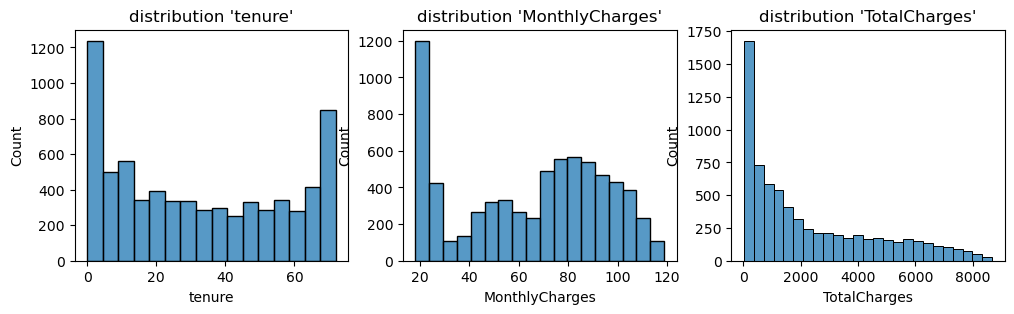

In [76]:
figure, ax_list = plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(12,3)

for i in range(3):
    sns.histplot(data=df.loc[:,numerical_cols[i]],ax=ax_list[i])
    ax_list[i].set_title(f"distribution '{numerical_cols[i]}'")

<Axes: xlabel='tenure', ylabel='Count'>

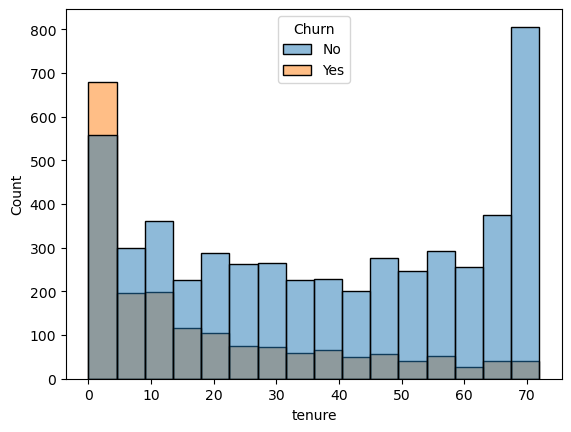

In [77]:
sns.histplot(data = df, x=df['tenure'], hue = 'Churn')

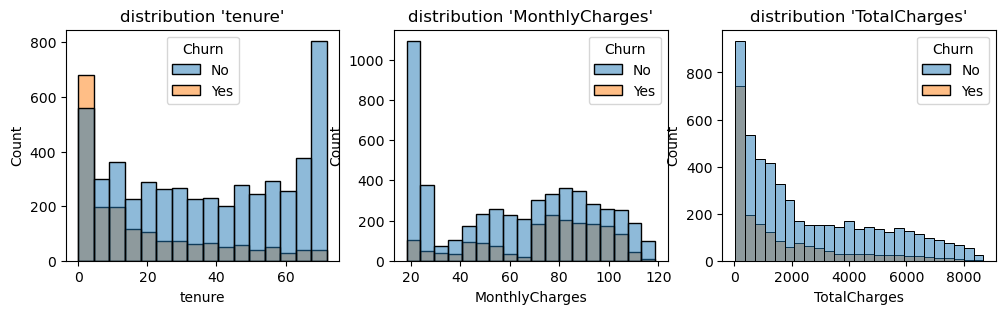

In [78]:
figure, ax_list = plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(12,3)

for i in range(3):
    sns.histplot(data=df,x=df.loc[:,numerical_cols[i]],ax=ax_list[i], hue = 'Churn')
    ax_list[i].set_title(f"distribution '{numerical_cols[i]}'")

(9, 2)
(18,)


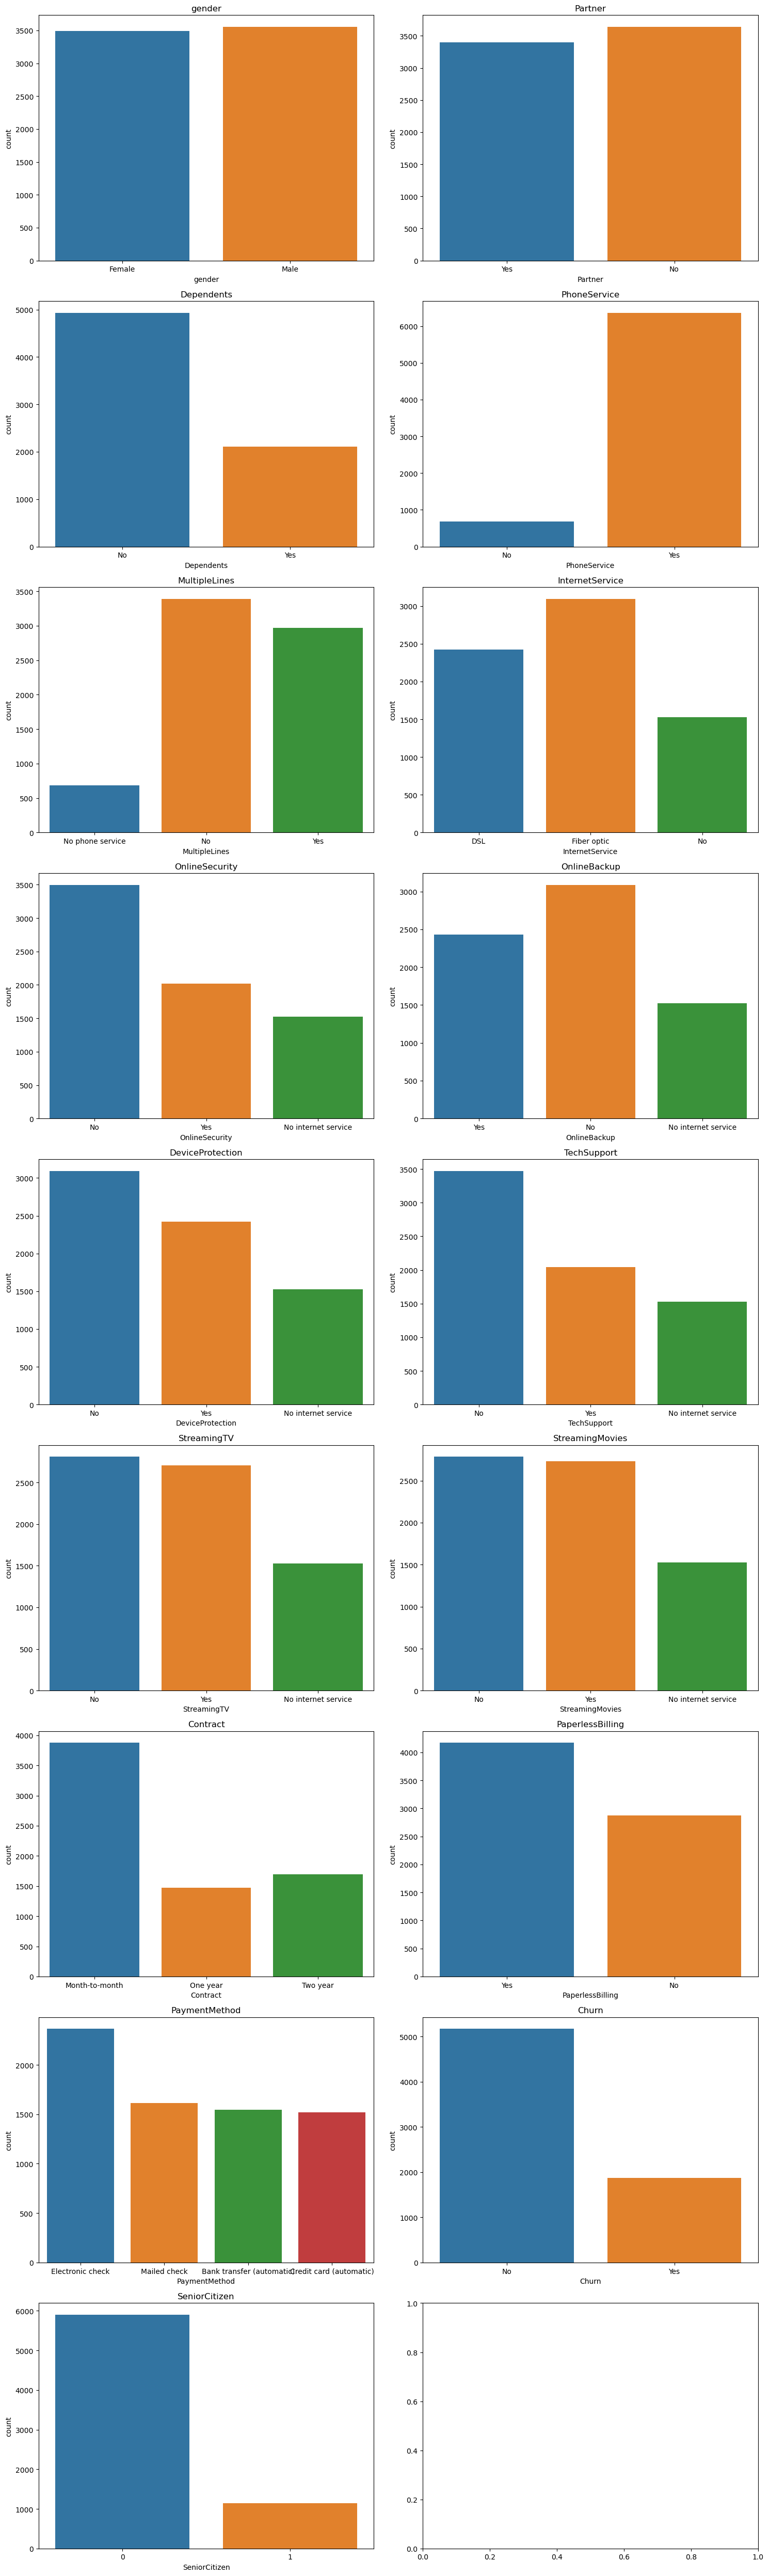

In [79]:
figure, ax_list_list = plt.subplots(nrows=9,ncols=2); 
figure.set_size_inches(15,50)

ax_list = ax_list_list.reshape(18)  
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col=category_cols[i]
    sns.countplot(data=df,x=col,ax=ax_list[i])
    ax_list[i].set_title(col)


plt.tight_layout()

(9, 2)
(18,)


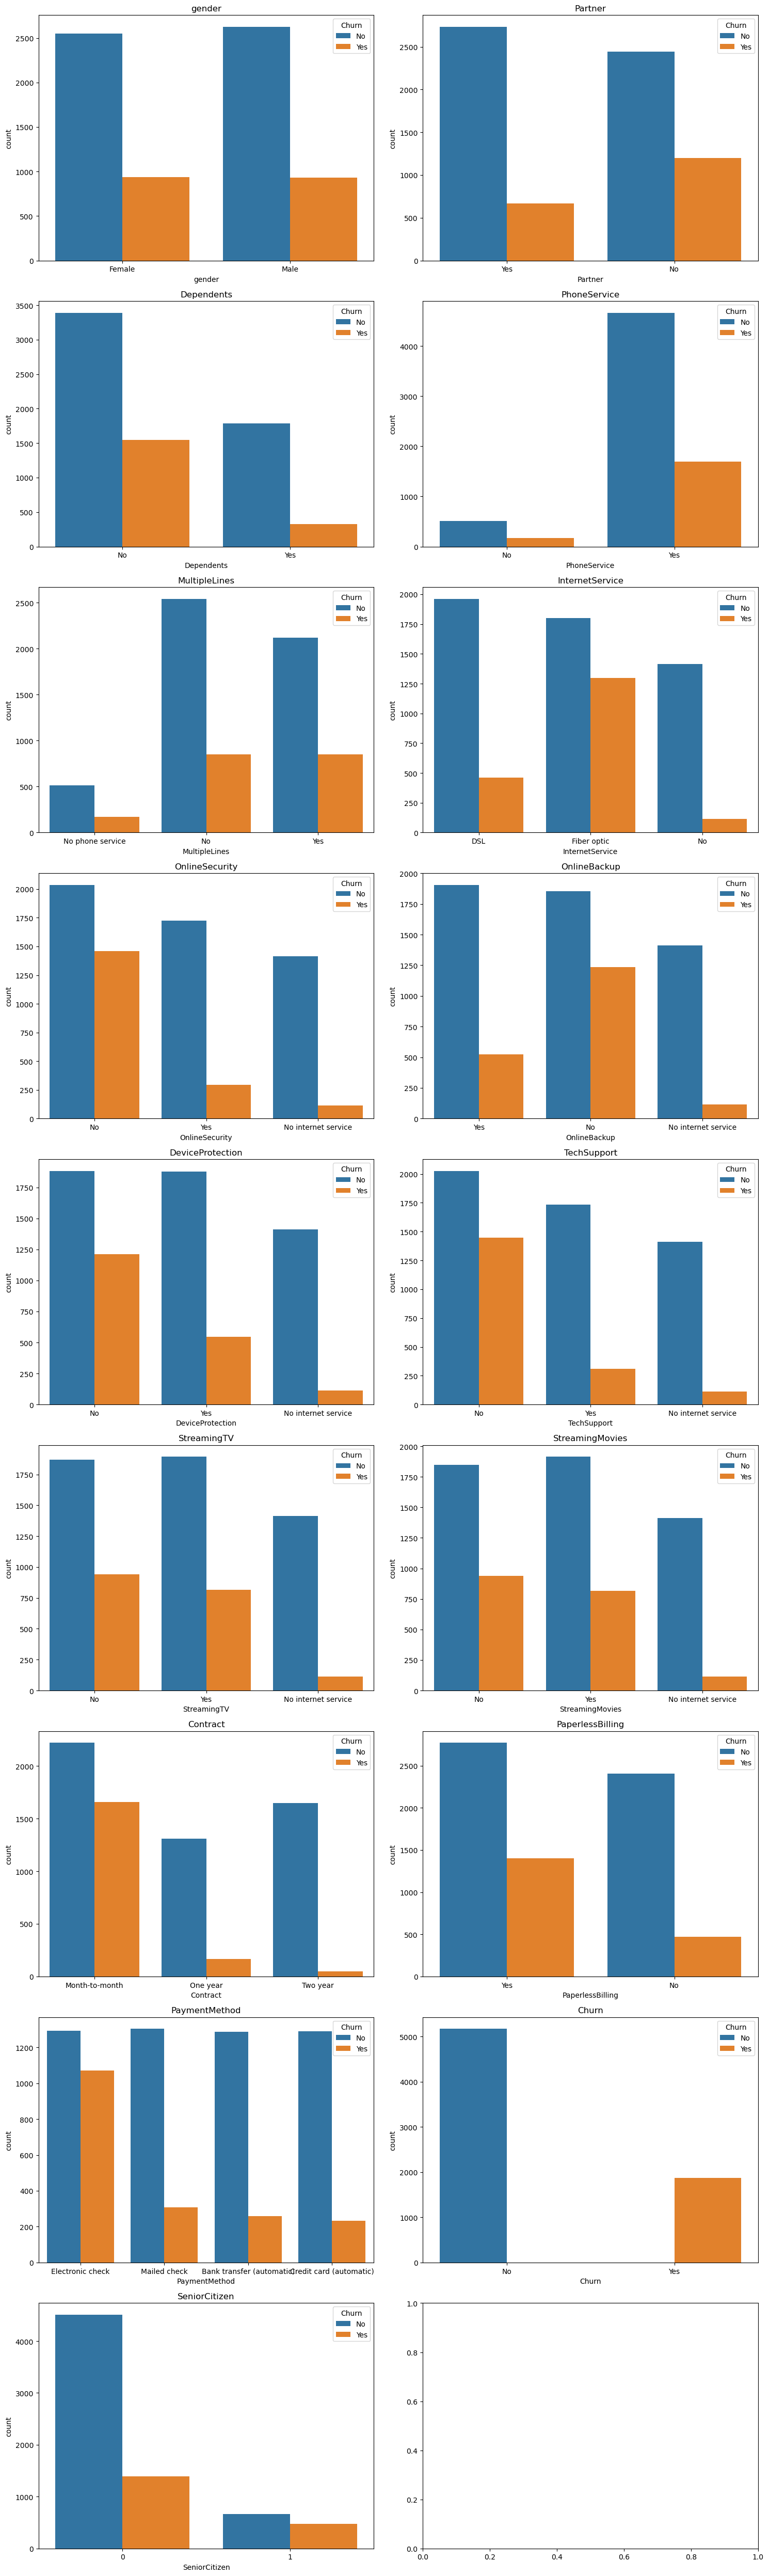

In [80]:
figure, ax_list_list = plt.subplots(nrows=9,ncols=2); 
figure.set_size_inches(15,50)

ax_list = ax_list_list.reshape(18)  
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col=category_cols[i]
    sns.countplot(data=df,x=col,ax=ax_list[i], hue='Churn')
    ax_list[i].set_title(col)


plt.tight_layout()

# 결측치 처리

In [81]:
df['TotalCharges'].isnull().sum()

11

In [82]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [83]:
df['TotalCharges_clean'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df['TotalCharges_clean'].isna().sum()
df.drop(columns='TotalCharges', axis=1, inplace=True)
df.rename(columns={'TotalCharges_clean':'TotalCharges'}, inplace= True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No,1990.50
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No,7362.90
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes,306.60


In [84]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
TotalCharges        0
dtype: int64

# 통계적 유의성 확인

In [85]:
df_TC = df[['tenure', 'Churn']]
df_TC = pd.get_dummies(df_TC, drop_first= True)
df_TC= df_TC.rename(columns={'Churn_Yes':'Churn'})
df_TC

,tenure,Churn
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1
...,...,...
7038,24,0
7039,72,0
7040,11,0
7041,4,1


In [86]:
#평균값 비교
pd.pivot_table(data= df_TC,
    values='tenure',
    index= 'Churn',
    aggfunc = 'mean')

,tenure
Churn,
0,37.569965
1,17.979133


In [87]:
df_TC_0 = df_TC[df_TC['Churn']==0]
df_TC_1= df_TC[df_TC['Churn']==1]

df_TC_0 = df_TC_0.drop('Churn', axis=1)
df_TC_1 = df_TC_1.drop('Churn', axis=1)

df_TC_0= df_TC_0.rename(columns={'tenure':'tenure_0'})
df_TC_1= df_TC_1.rename(columns={'tenure':'tenure_1'})

df_TC_0 = df_TC_0.reset_index(drop=True)
df_TC_1 = df_TC_1.reset_index(drop=True)

df_TC = pd.concat([df_TC_0, df_TC_1],axis=1)
df_TC

,tenure_0,tenure_1
0,1,2.0
1,34,2.0
2,45,8.0
3,22,28.0
4,10,49.0
...,...,...
5169,72,NaN
5170,24,NaN
5171,72,NaN
5172,11,NaN


In [88]:
#정규분포 검정
#귀무가설: 정규분포
#대립가설: 정규분포가 아니다
# 0.05에서 모두 대립가설 채택
#mann-whitney test 검정 필요

print(shapiro(df_TC_0))
print(shapiro(df_TC_1))

ShapiroResult(statistic=0.9176814556121826, pvalue=0.0)
ShapiroResult(statistic=0.8199726343154907, pvalue=1.466178583223056e-41)


C:\Users\c\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [89]:
#mann-whitney test 검정
#귀무가설: 두 평균은 차이가 없다
#대립가설: 두 평균은 차이가 있다
#대립가설 채택

mannwhitneyu(df_TC_0, df_TC_1)

MannwhitneyuResult(statistic=array([7154668.]), pvalue=array([2.41963552e-208]))

In [90]:
#H0 : df_TC_0의 평균이 df_TC_1의 평균보다 크지 않다
#H1 :  df_TC_0의 평균이 df_TC_1의 평균보다 크다
# 대립가설 채택
# 0 그룹의 평균은 1 그룹의 평균보다 크다

mannwhitneyu(df_TC_0, df_TC_1, alternative= "greater")

MannwhitneyuResult(statistic=array([7154668.]), pvalue=array([1.20981776e-208]))

In [91]:
#카이제곱 검정으로 통계적 유의성 확인
df_I = df[['InternetService', 'Churn']]
df_I = pd.get_dummies(df_I, columns= ['Churn'],drop_first= True)
df_I= df_I.rename(columns={'Churn_Yes':'Churn'})
crosstab = pd.crosstab(df_I['InternetService'], df_I['Churn'])

#대립가설 채택
chiresult = chi2_contingency(crosstab, correction=False)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

Chi square: 732.309589667794
P-value: 9.571788222840544e-160


In [92]:
cols = ['InternetService','OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract']
df_cols = df[['InternetService','OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'Churn']]
df_cols

,InternetService,OnlineBackup,DeviceProtection,TechSupport,Contract,Churn
0,DSL,Yes,No,No,Month-to-month,No
1,DSL,No,Yes,No,One year,No
2,DSL,Yes,No,No,Month-to-month,Yes
3,DSL,No,Yes,Yes,One year,No
4,Fiber optic,No,No,No,Month-to-month,Yes
...,...,...,...,...,...,...
7038,DSL,No,Yes,Yes,One year,No
7039,Fiber optic,Yes,Yes,No,One year,No
7040,DSL,No,No,No,Month-to-month,No
7041,Fiber optic,No,No,No,Month-to-month,Yes


In [93]:

for i in range(len(cols)):
    
    df_I = df_cols.iloc[:,i]
    Churn = df_cols['Churn']
    name = cols[i]
    
    df_I = pd.concat([df_I, Churn], axis=1)
    df_I = pd.get_dummies(df_I, columns= ['Churn'],drop_first= True)
    df_I= df_I.rename(columns={'Churn_Yes':'Churn'})
    crosstab = pd.crosstab(df_I.iloc[:, 0], df_I['Churn'])
    
    chiresult = chi2_contingency(crosstab, correction=False)
    print('{}의 Chi square: {}'.format(name, chiresult[0]))
    print('{}의 P-value: {}'.format(name, chiresult[1]))
    

InternetService의 Chi square: 732.309589667794
InternetService의 P-value: 9.571788222840544e-160
OnlineBackup의 Chi square: 601.812790113409
OnlineBackup의 P-value: 2.0797592160864276e-131
DeviceProtection의 Chi square: 558.419369407389
DeviceProtection의 P-value: 5.505219496457244e-122
TechSupport의 Chi square: 828.1970684587394
TechSupport의 P-value: 1.4430840279998987e-180
Contract의 Chi square: 1184.5965720837926
Contract의 P-value: 5.863038300673391e-258


# 인과 추론을 위한 로지스틱 회귀분석 1-1(라쏘 회귀를 통한 변수 선택)

In [94]:
df_clean = pd.get_dummies(df, columns= {'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'}, drop_first = True)

C:\Users\c\AppData\Local\Temp\ipykernel_29924\236031730.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_clean = pd.get_dummies(df, columns= {'gender',


In [95]:
scaler = StandardScaler()
df_num = scaler.fit_transform(df_clean[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [96]:
df_num = pd.DataFrame(data=df_num, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
df_num.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


In [97]:
df_clean = df_clean.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'],axis=1)

In [98]:
df_total = pd.concat([df_clean, df_num], axis=1)

In [99]:
df_total.columns

Index(['customerID', 'SeniorCitizen', 'InternetService_Fiber optic',
       'InternetService_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'gender_Male', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Partner_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'PaperlessBilling_Yes', 'PhoneService_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'Dependents_Yes', 'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_One year', 'Contract_Two year', 'Churn_Yes', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [100]:
X = df_total[['InternetService_Fiber optic', 'InternetService_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes', 'SeniorCitizen',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'PhoneService_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'Dependents_Yes', 'PaperlessBilling_Yes', 'Partner_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'tenure', 'MonthlyCharges', 'TotalCharges']]

Y = df_total['Churn_Yes']

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1234)

In [102]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5634, 30), (1409, 30), (5634,), (1409,))

### 변수 선택 기법

In [103]:
lasso = Lasso().fit(X_train, Y_train)
lasso001 = Lasso(alpha=0.01).fit(X_train, Y_train)
lasso10000 = Lasso(alpha=0.0001).fit(X_train, Y_train)
lasso001_10000 = Lasso(alpha=0.01, max_iter = 10000).fit(X_train, Y_train)


print("lasso_train R2: {:.3f}".format(lasso.score(X_train, Y_train)))
print("lasso_test R2: {:.3f}".format(lasso.score(X_train, Y_train)))
print("num_of_IV:", np.sum(lasso.coef_ !=0))

print("lasso001_train R2: {:.3f}".format(lasso001.score(X_train, Y_train)))
print("lasso001_test R2: {:.3f}".format(lasso001.score(X_train, Y_train)))
print("num_of_IV:", np.sum(lasso001.coef_ !=0))

print("lasso10000_train R2: {:.3f}".format(lasso10000.score(X_train, Y_train)))
print("lasso10000_test R2: {:.3f}".format(lasso10000.score(X_train, Y_train)))
print("num_of_IV:", np.sum(lasso10000.coef_ !=0))

print("lasso10000_train R2: {:.3f}".format(lasso001_10000.score(X_train, Y_train)))
print("lasso10000_test R2: {:.3f}".format(lasso001_10000.score(X_train, Y_train)))
print("num_of_IV:", np.sum(lasso001_10000.coef_ !=0))

lasso_train R2: 0.000
lasso_test R2: 0.000
num_of_IV: 0
lasso001_train R2: 0.269
lasso001_test R2: 0.269
num_of_IV: 11
lasso10000_train R2: 0.294
lasso10000_test R2: 0.294
num_of_IV: 27
lasso10000_train R2: 0.269
lasso10000_test R2: 0.269
num_of_IV: 11


In [104]:
lasso001.coef_

array([ 0.07826817, -0.        , -0.        ,  0.        ,  0.00333327,
       -0.        , -0.03088499, -0.        , -0.        ,  0.08950549,
       -0.        , -0.03556901, -0.00569922, -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.03395379,
       -0.        , -0.        , -0.        ,  0.02998405, -0.        ,
       -0.        , -0.        , -0.10114942,  0.1041948 , -0.0618527 ])

In [105]:
lasso001_coef = pd.DataFrame()
lasso001_coef['coef'] = lasso001.coef_
colum_name = X_train.columns
lasso001_coef.insert(0, 'name', colum_name)
lasso001_coef

,name,coef
0,InternetService_Fiber optic,0.078268
1,InternetService_No,-0.000000
2,StreamingTV_No internet service,-0.000000
3,StreamingTV_Yes,0.000000
4,SeniorCitizen,0.003333
5,OnlineSecurity_No internet service,-0.000000
6,OnlineSecurity_Yes,-0.030885
7,PhoneService_Yes,-0.000000
8,PaymentMethod_Credit card (automatic),-0.000000
9,PaymentMethod_Electronic check,0.089505


In [106]:
selection = lasso001_coef[lasso001_coef['coef']!=0].iloc[:,0].tolist()
selection

['InternetService_Fiber optic',
 'SeniorCitizen',
 'OnlineSecurity_Yes',
 'PaymentMethod_Electronic check',
 'Contract_One year',
 'Contract_Two year',
 'TechSupport_Yes',
 'PaperlessBilling_Yes',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

In [107]:
X_train[selection]

,InternetService_Fiber optic,SeniorCitizen,OnlineSecurity_Yes,PaymentMethod_Electronic check,Contract_One year,Contract_Two year,TechSupport_Yes,PaperlessBilling_Yes,tenure,MonthlyCharges,TotalCharges
3486,1,0,1,0,1,0,0,0,0.595692,0.998351,0.995066
1484,1,1,0,1,0,1,0,1,1.572981,1.144590,2.177304
6102,0,0,1,0,0,1,1,1,1.287938,0.672639,1.413831
651,1,0,0,0,0,0,0,1,-1.277445,0.326985,-0.974486
2178,0,0,0,0,0,1,0,0,0.840014,-1.491021,-0.517356
...,...,...,...,...,...,...,...,...,...,...,...
664,0,0,0,0,0,1,0,0,1.002896,-1.504315,-0.491948
3276,1,0,0,1,0,0,0,1,-1.155283,0.478209,-0.867361
1318,0,0,1,1,0,0,0,1,-0.992402,0.064421,-0.751803
723,0,0,0,1,0,0,0,1,-1.196004,-0.645166,-0.944951


In [108]:
logit_m = sm.Logit(Y_train, sm.add_constant(X_train[selection])).fit()
logit_m.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\c\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\c\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\c\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\c\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5622
Method:                           MLE   Df Model:                           11
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                     inf
Time:                        15:07:33   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4412      0.127    -11.335      0.000      -1.690      -1.192
InternetService_Fiber optic        0.2482      0.150      1.656      0.098      -0.046       0.542
SeniorCitizen                      0.2525      0.093      2.717      0.007       0.070       0.435
OnlineSecurity_Yes                -0.4552      0.097     -4.708      0.000      -0.645      -0.266
PaymentMethod_Electronic check     0.4932      0.076      6.465      0.000       0.344       0.643
Contract_One year                 -0.7957      0.118     -6.748      0.000      -1.027      -0.565
Contract_Two year                 -1.6919      0.204     -8.305      0.000      -2.091      -1.293
TechSupport_Yes                   -0.4111      0.100     -4.097      0.000      -0.608      -0.214
PaperlessBilling_Yes               0.3662      0.083      4.436      0.000       0.204       0.528
tenure                            -1.3784      0.164     -8.394      0.000      -1.700      -1.057
MonthlyCharges                     0.5137      0.099      5.182      0.000       0.319       0.708
TotalCharges                       0.6245      0.171      3.661      0.000       0.290       0.959
==================================================================================================
"""

In [109]:
model = LogisticRegression()
model.fit(X_train, Y_train)

print('학습셋 모델 정확도:', model.score(X_train, Y_train))
print('테스트셋 모델 정확도:', model.score(X_test, Y_test))

학습셋 모델 정확도: 0.8097266595669151
테스트셋 모델 정확도: 0.794889992902768


정확도: 0.7949, 정밀도: 0.6225, 재현율: 0.5179, F1: 0.5654


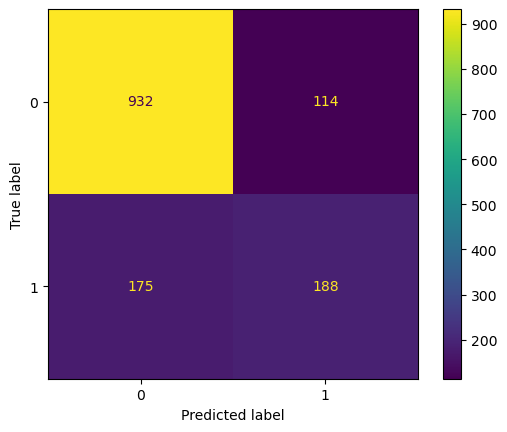

In [122]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

confusion = confusion_matrix(Y_test, Y_test_pred)
accuracy = accuracy_score(Y_test, Y_test_pred)
precision = precision_score(Y_test, Y_test_pred)
recall = recall_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)
    
   
print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}")
cm_display = ConfusionMatrixDisplay(confusion).plot()

In [110]:
np.exp(logit_m.params)

const                             0.236652
InternetService_Fiber optic       1.281664
SeniorCitizen                     1.287295
OnlineSecurity_Yes                0.634301
PaymentMethod_Electronic check    1.637544
Contract_One year                 0.451246
Contract_Two year                 0.184167
TechSupport_Yes                   0.662933
PaperlessBilling_Yes              1.442238
tenure                            0.251989
MonthlyCharges                    1.671512
TotalCharges                      1.867237
dtype: float64

# 인과 추론을 위한 로지스틱 회귀분석 1-2(RFE를 통한 변수 선택)

In [143]:
df_clean = pd.get_dummies(df, columns= {'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'}, drop_first = True)

C:\Users\c\AppData\Local\Temp\ipykernel_29924\236031730.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_clean = pd.get_dummies(df, columns= {'gender',


In [144]:
scaler = StandardScaler()
df_num = scaler.fit_transform(df_clean[['tenure', 'MonthlyCharges', 'TotalCharges']])
df_num = pd.DataFrame(data=df_num, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
df_clean = df_clean.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'],axis=1)
df_total = pd.concat([df_clean, df_num], axis=1)
df_total.columns

Index(['customerID', 'SeniorCitizen', 'InternetService_Fiber optic',
       'InternetService_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'gender_Male', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Partner_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'PaperlessBilling_Yes', 'PhoneService_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'Dependents_Yes', 'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_One year', 'Contract_Two year', 'Churn_Yes', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [145]:
X = df_total[['InternetService_Fiber optic', 'InternetService_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes', 'SeniorCitizen',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'PhoneService_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'Dependents_Yes', 'PaperlessBilling_Yes', 'Partner_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'tenure', 'MonthlyCharges', 'TotalCharges']]

Y = df_total['Churn_Yes']

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1234)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5634, 30) (1409, 30) (5634,) (1409,)


### 변수 선택 기법

In [147]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10, step=10)
fit = rfe.fit(X_train, Y_train)

print(fit.n_features_)
print(fit.support_) 
print(fit.ranking_) 

10
[ True False False  True False False False False False  True False  True
  True False False  True False  True False False False False False False
 False False False  True  True  True]
[1 2 2 1 2 2 2 2 3 1 3 1 1 3 2 1 3 1 3 2 3 3 3 2 3 2 3 1 1 1]


In [148]:
X_train.columns.tolist()
fit.support_.tolist()

LR_choice = pd.DataFrame(fit.support_.tolist(), X_train.columns.tolist()).reset_index()
LR_choice_name = LR_choice[LR_choice[0]==True]['index'].tolist()
LR_choice_name

['InternetService_Fiber optic',
 'StreamingTV_Yes',
 'PaymentMethod_Electronic check',
 'Contract_One year',
 'Contract_Two year',
 'MultipleLines_Yes',
 'StreamingMovies_Yes',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

In [149]:
X_train[LR_choice_name]

,InternetService_Fiber optic,StreamingTV_Yes,PaymentMethod_Electronic check,Contract_One year,Contract_Two year,MultipleLines_Yes,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
3486,1,1,0,1,0,1,0,0.595692,0.998351,0.995066
1484,1,1,1,0,1,0,1,1.572981,1.144590,2.177304
6102,0,1,0,0,1,1,1,1.287938,0.672639,1.413831
651,1,0,0,0,0,0,0,-1.277445,0.326985,-0.974486
2178,0,0,0,0,1,0,0,0.840014,-1.491021,-0.517356
...,...,...,...,...,...,...,...,...,...,...
664,0,0,0,0,1,0,0,1.002896,-1.504315,-0.491948
3276,1,0,1,0,0,0,1,-1.155283,0.478209,-0.867361
1318,0,0,1,0,0,0,1,-0.992402,0.064421,-0.751803
723,0,0,1,0,0,0,0,-1.196004,-0.645166,-0.944951


In [150]:
logit_m = sm.Logit(Y_train, sm.add_constant(X_train[LR_choice_name])).fit()
logit_m.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\c\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\c\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\c\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\c\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5623
Method:                           MLE   Df Model:                           10
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                     inf
Time:                        15:16:30   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.1016      0.138    -15.247      0.000      -2.372      -1.831
InternetService_Fiber optic        1.0716      0.155      6.908      0.000       0.768       1.376
StreamingTV_Yes                    0.3092      0.100      3.084      0.002       0.113       0.506
PaymentMethod_Electronic check     0.5615      0.075      7.447      0.000       0.414       0.709
Contract_One year                 -0.9245      0.117     -7.925      0.000      -1.153      -0.696
Contract_Two year                 -1.9554      0.201     -9.752      0.000      -2.348      -1.562
MultipleLines_Yes                  0.2903      0.090      3.222      0.001       0.114       0.467
StreamingMovies_Yes                0.4058      0.099      4.085      0.000       0.211       0.600
tenure                            -1.2714      0.160     -7.958      0.000      -1.585      -0.958
MonthlyCharges                    -0.0974      0.115     -0.843      0.399      -0.324       0.129
TotalCharges                       0.4467      0.167      2.667      0.008       0.118       0.775
==================================================================================================
"""

In [151]:
model = LogisticRegression()
model.fit(X_train[LR_choice_name], Y_train)

print('학습셋 모델 정확도:', model.score(X_train[LR_choice_name], Y_train))
print('테스트셋 모델 정확도:', model.score(X_test[LR_choice_name], Y_test))

학습셋 모델 정확도: 0.8031593894213702
테스트셋 모델 정확도: 0.7821149751596878


정확도: 0.7821, 정밀도: 0.5966, 재현율: 0.4766, F1: 0.5299


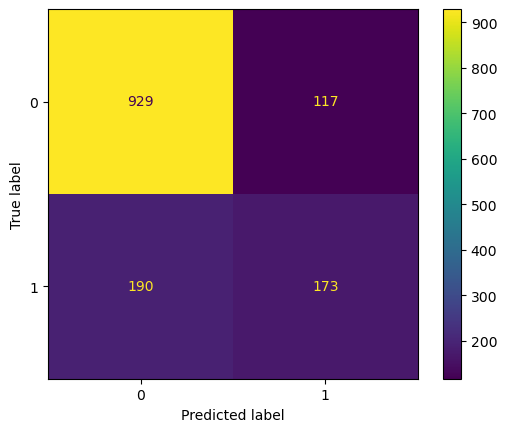

In [154]:
Y_train_pred = model.predict(X_train[LR_choice_name])
Y_test_pred = model.predict(X_test[LR_choice_name])

confusion = confusion_matrix(Y_test, Y_test_pred)
accuracy = accuracy_score(Y_test, Y_test_pred)
precision = precision_score(Y_test, Y_test_pred)
recall = recall_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)
    
   
print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}")
cm_display = ConfusionMatrixDisplay(confusion).plot()

In [168]:
np.exp(logit_m.params)

const                             0.122256
InternetService_Fiber optic       2.920187
StreamingTV_Yes                   1.362288
PaymentMethod_Electronic check    1.753251
Contract_One year                 0.396731
Contract_Two year                 0.141503
MultipleLines_Yes                 1.336810
StreamingMovies_Yes               1.500456
tenure                            0.280428
MonthlyCharges                    0.907238
TotalCharges                      1.563093
dtype: float64

# XGBClassifier 분류 모델 제작

In [33]:
df_clean = pd.get_dummies(df, columns= {'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'}, drop_first = True)

df_clean

C:\Users\c\AppData\Local\Temp\ipykernel_29924\1681578876.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_clean = pd.get_dummies(df, columns= {'gender',


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,StreamingMovies_No internet service,StreamingMovies_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,MultipleLines_No phone service,MultipleLines_Yes,gender_Male,OnlineBackup_No internet service,OnlineBackup_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,StreamingTV_No internet service,StreamingTV_Yes,PaperlessBilling_Yes,PhoneService_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,Dependents_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,0,34,56.95,1889.50,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
2,3668-QPYBK,0,2,53.85,108.15,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0
7039,2234-XADUH,0,72,103.20,7362.90,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,0,1,1,0,0,1,0,0
7040,4801-JZAZL,0,11,29.60,346.45,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0
7041,8361-LTMKD,1,4,74.40,306.60,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1


In [34]:
scaler = StandardScaler()
df_num = scaler.fit_transform(df_clean[['tenure', 'MonthlyCharges', 'TotalCharges']])
df_num = pd.DataFrame(data=df_num, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])

df_num.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


In [35]:
df_clean = df_clean.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'],axis=1)

df_total = pd.concat([df_clean, df_num], axis=1)


df_total.columns

Index(['customerID', 'SeniorCitizen', 'InternetService_Fiber optic',
       'InternetService_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'gender_Male', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Partner_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'PaperlessBilling_Yes', 'PhoneService_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'Dependents_Yes', 'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_One year', 'Contract_Two year', 'Churn_Yes', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [36]:
X = df_total[['InternetService_Fiber optic', 'InternetService_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes', 'SeniorCitizen',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'PhoneService_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'Dependents_Yes', 'PaperlessBilling_Yes', 'Partner_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'tenure', 'MonthlyCharges', 'TotalCharges']]

Y = df_total['Churn_Yes']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1234)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5634, 30) (1409, 30) (5634,) (1409,)


In [38]:
dtrain = xgb.DMatrix(data = X_train, label = Y_train)
dtest = xgb.DMatrix(data = X_test, label = Y_test)

params = {
    "max_depth": 3, 
    "eta": 0.1, 
    "objective": "binary:logistic", 
    "eval_metric": "logloss"}

num_rounds = 400

In [39]:
wlist = [(dtrain, "train"), (dtest, "eval")]

xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds,
                      evals = wlist)

[0]	train-logloss:0.55640	eval-logloss:0.55185
[1]	train-logloss:0.53672	eval-logloss:0.53586
[2]	train-logloss:0.52092	eval-logloss:0.52360
[3]	train-logloss:0.50719	eval-logloss:0.51195
[4]	train-logloss:0.49480	eval-logloss:0.50254
[5]	train-logloss:0.48468	eval-logloss:0.49416
[6]	train-logloss:0.47600	eval-logloss:0.48737
[7]	train-logloss:0.46853	eval-logloss:0.48173
[8]	train-logloss:0.46200	eval-logloss:0.47659
[9]	train-logloss:0.45513	eval-logloss:0.47185
[10]	train-logloss:0.45009	eval-logloss:0.46817
[11]	train-logloss:0.44568	eval-logloss:0.46487
[12]	train-logloss:0.44059	eval-logloss:0.46146
[13]	train-logloss:0.43709	eval-logloss:0.45925
[14]	train-logloss:0.43393	eval-logloss:0.45714
[15]	train-logloss:0.43050	eval-logloss:0.45476
[16]	train-logloss:0.42756	eval-logloss:0.45264
[17]	train-logloss:0.42459	eval-logloss:0.45079
[18]	train-logloss:0.42239	eval-logloss:0.44868
[19]	train-logloss:0.42033	eval-logloss:0.44734
[20]	train-logloss:0.41792	eval-logloss:0.44637
[2

[170]	train-logloss:0.36121	eval-logloss:0.44067
[171]	train-logloss:0.36109	eval-logloss:0.44064
[172]	train-logloss:0.36103	eval-logloss:0.44069
[173]	train-logloss:0.36086	eval-logloss:0.44073
[174]	train-logloss:0.36068	eval-logloss:0.44085
[175]	train-logloss:0.36047	eval-logloss:0.44096
[176]	train-logloss:0.36026	eval-logloss:0.44092
[177]	train-logloss:0.36002	eval-logloss:0.44090
[178]	train-logloss:0.35989	eval-logloss:0.44117
[179]	train-logloss:0.35978	eval-logloss:0.44125
[180]	train-logloss:0.35957	eval-logloss:0.44123
[181]	train-logloss:0.35947	eval-logloss:0.44115
[182]	train-logloss:0.35931	eval-logloss:0.44123
[183]	train-logloss:0.35904	eval-logloss:0.44144
[184]	train-logloss:0.35885	eval-logloss:0.44156
[185]	train-logloss:0.35871	eval-logloss:0.44160
[186]	train-logloss:0.35851	eval-logloss:0.44187
[187]	train-logloss:0.35831	eval-logloss:0.44193
[188]	train-logloss:0.35808	eval-logloss:0.44209
[189]	train-logloss:0.35779	eval-logloss:0.44229
[190]	train-logloss:

[338]	train-logloss:0.33625	eval-logloss:0.44631
[339]	train-logloss:0.33606	eval-logloss:0.44641
[340]	train-logloss:0.33596	eval-logloss:0.44629
[341]	train-logloss:0.33592	eval-logloss:0.44631
[342]	train-logloss:0.33580	eval-logloss:0.44650
[343]	train-logloss:0.33573	eval-logloss:0.44660
[344]	train-logloss:0.33557	eval-logloss:0.44667
[345]	train-logloss:0.33541	eval-logloss:0.44671
[346]	train-logloss:0.33527	eval-logloss:0.44687
[347]	train-logloss:0.33517	eval-logloss:0.44697
[348]	train-logloss:0.33499	eval-logloss:0.44689
[349]	train-logloss:0.33495	eval-logloss:0.44688
[350]	train-logloss:0.33478	eval-logloss:0.44661
[351]	train-logloss:0.33467	eval-logloss:0.44663
[352]	train-logloss:0.33451	eval-logloss:0.44659
[353]	train-logloss:0.33434	eval-logloss:0.44657
[354]	train-logloss:0.33423	eval-logloss:0.44648
[355]	train-logloss:0.33407	eval-logloss:0.44644
[356]	train-logloss:0.33392	eval-logloss:0.44661
[357]	train-logloss:0.33387	eval-logloss:0.44681
[358]	train-logloss:

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay


def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)
   
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")
    cm_display = ConfusionMatrixDisplay(confusion).plot()

In [41]:
# 예측 확률
pred_probs = xgb_model.predict(dtest)
print("predict() 수행 결과값 10개만 표시")
print(np.round(pred_probs[:10], 3))

# 예측 분류
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print("예측 분류 10개만 표시")
print(f"{preds[:10]}")

predict() 수행 결과값 10개만 표시
[0.147 0.108 0.014 0.583 0.239 0.406 0.261 0.752 0.041 0.011]
예측 분류 10개만 표시
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


정확도: 0.7970, 정밀도: 0.6332, 재현율: 0.5041, F1: 0.5613, AUC: 0.8180


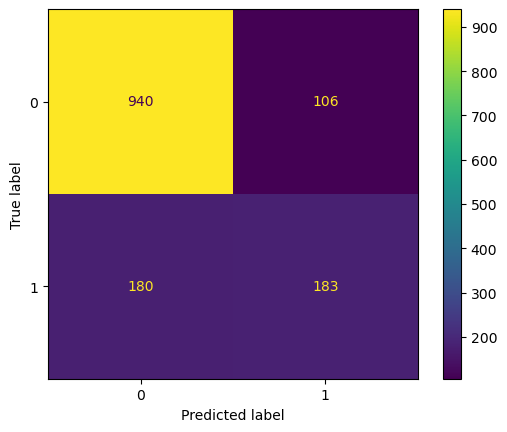

In [42]:
get_clf_eval(Y_test, pred = preds, pred_proba_po = pred_probs)

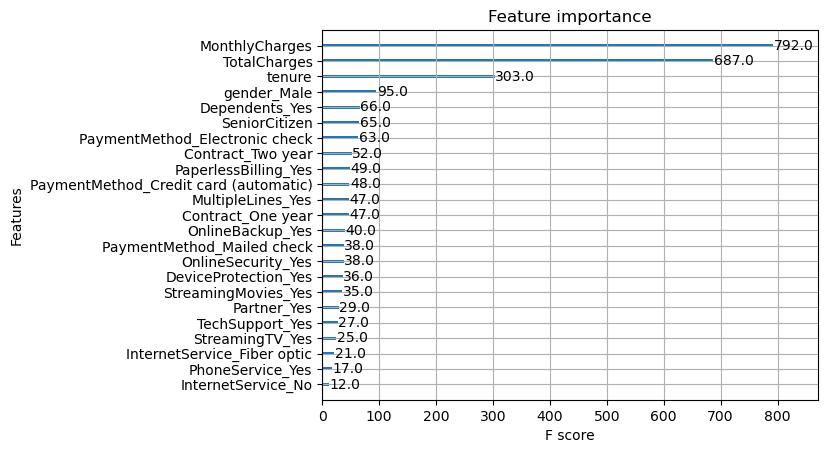

In [43]:
plot_importance(xgb_model)
plt.show()

In [320]:
xgb_wrapper = XGBClassifier(objective= 'binary:logistic',n_estimators=100)


hyperparameter = {'model__max_depth':range(3,6),
                 'model__learning_rate': np.random.uniform(0.01, 0.3,5),
                 'model__gamma': np.random.uniform(0, 1,5),
                 'model__colsample_bytree': np.random.uniform(0, 1,5),
                 'model__lambda': np.random.uniform(0.1, 0.2,5),
                 'model__scale_pos_weight': [1,3,5],
                 'model__early_stoppings' : [50, 100]}

grid_model = GridSearchCV(xgb_wrapper, param_grid=hyperparameter, cv=10, n_jobs=-1)
grid_model.fit(X_train,Y_train)

KeyboardInterrupt: 

In [73]:
best_model = grid_model.best_estimator_

정확도: 0.7750, 정밀도: 0.5747, 재현율: 0.4876, F1: 0.5276, AUC: 0.7944


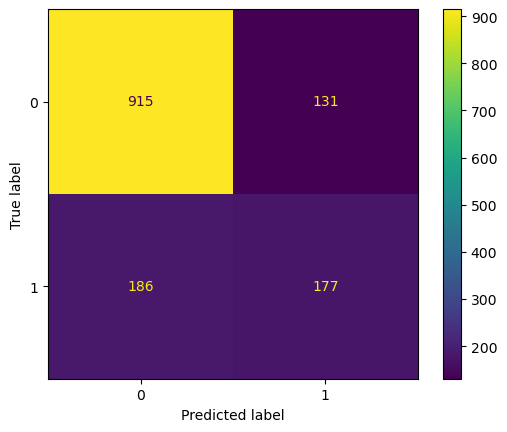

In [74]:
ws100_preds = grid_model.predict(X_test)
ws100_pred_probs = grid_model.predict_proba(X_test)[:,1]

get_clf_eval(Y_test, pred = ws100_preds, pred_proba_po = ws100_pred_probs)

In [ ]:
def func_eval(model):
    Y_train_pred = model.predict(X_train)
    Y_test_pred  = model.predict(X_test)
    train_acc = accuracy_score(Y_train, Y_train_pred)
    test_acc  = accuracy_score(Y_test, Y_test_pred)
    train_f1  = f1_score(Y_train, Y_train_pred)
    test_f1   = f1_score(Y_test, Y_test_pred)
    return [train_acc, test_acc, train_f1, test_f1]

In [75]:
print(grid_model.best_params_)
print(grid_model.best_estimator_)

{'model__colsample_bytree': 0.8309147289906907, 'model__early_stoppings': 50, 'model__gamma': 0.7670251661985964, 'model__lambda': 0.11711154762184278, 'model__learning_rate': 0.048961601283799096, 'model__max_depth': 3, 'model__scale_pos_weight': 1}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan,
              model__colsample_bytree=0.8309147289906907,
              model__early_stoppings=50, model__gamma=0.7670251661985964,
              m

In [76]:
pd.DataFrame(grid_model.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__colsample_bytree,param_model__early_stoppings,param_model__gamma,param_model__lambda,param_model__learning_rate,param_model__max_depth,param_model__scale_pos_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.150136,0.016772,0.005405,0.000490,0.830915,50,0.767025,0.117112,0.048962,3,1,{'model__colsample_bytree': 0.8309147289906907...,0.797872,0.765957,0.757092,0.771277,0.817052,0.809947,0.783304,0.811723,0.79929,0.761989,0.78755,0.021286,1
7495,0.138726,0.002803,0.004904,0.000300,0.76769,50,0.178554,0.112316,0.285813,5,3,{'model__colsample_bytree': 0.7676895094553543...,0.797872,0.765957,0.757092,0.771277,0.817052,0.809947,0.783304,0.811723,0.79929,0.761989,0.78755,0.021286,1
7496,0.147033,0.010133,0.004704,0.000459,0.76769,50,0.178554,0.112316,0.285813,5,5,{'model__colsample_bytree': 0.7676895094553543...,0.797872,0.765957,0.757092,0.771277,0.817052,0.809947,0.783304,0.811723,0.79929,0.761989,0.78755,0.021286,1
7497,0.140628,0.004482,0.004804,0.000400,0.76769,50,0.178554,0.112316,0.04339,3,1,{'model__colsample_bytree': 0.7676895094553543...,0.797872,0.765957,0.757092,0.771277,0.817052,0.809947,0.783304,0.811723,0.79929,0.761989,0.78755,0.021286,1
7498,0.139126,0.003691,0.004304,0.000459,0.76769,50,0.178554,0.112316,0.04339,3,3,{'model__colsample_bytree': 0.7676895094553543...,0.797872,0.765957,0.757092,0.771277,0.817052,0.809947,0.783304,0.811723,0.79929,0.761989,0.78755,0.021286,1


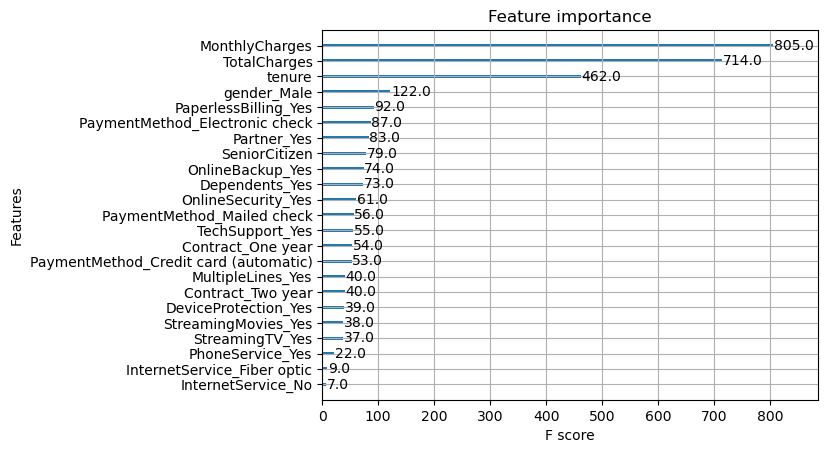

In [77]:
plot_importance(grid_model.best_estimator_)
plt.show()

# 파이프라인을 통한 모델 구축

In [46]:
df['SeniorCitizen'].value_counts()
df['SeniorCitizen_O'] = df['SeniorCitizen'].replace({0:'NO', 1:'YES'})
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [47]:
df.drop(columns='SeniorCitizen', axis=1, inplace=True)
df.rename(columns={'SeniorCitizen_O':'SeniorCitizen'}, inplace=True)
df

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges,SeniorCitizen
0,7590-VHVEG,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85,NO
1,5575-GNVDE,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,1889.50,NO
2,3668-QPYBK,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.15,NO
3,7795-CFOCW,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1840.75,NO
4,9237-HQITU,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,151.65,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No,1990.50,NO
7039,2234-XADUH,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No,7362.90,NO
7040,4801-JZAZL,Female,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No,346.45,NO
7041,8361-LTMKD,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes,306.60,YES


In [48]:
df = pd.get_dummies(data = df, columns=['Churn'],drop_first=True)
df

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen,Churn_Yes
0,7590-VHVEG,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,NO,0
1,5575-GNVDE,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,NO,0
2,3668-QPYBK,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,NO,1
3,7795-CFOCW,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,NO,0
4,9237-HQITU,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,NO,0
7039,2234-XADUH,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,NO,0
7040,4801-JZAZL,Female,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,NO,0
7041,8361-LTMKD,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,YES,1


In [49]:
X = df[['gender', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']]

Y = df['Churn_Yes']

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1234)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5634, 19) (1409, 19) (5634,) (1409,)


In [51]:
num_features = ['tenure','MonthlyCharges','TotalCharges']
                
num_transformer = Pipeline(
    steps = [('imputer', SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())])

In [52]:
cat_features = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']
cat_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy='most_frequent')), ("encoder", OneHotEncoder(handle_unknown='ignore'))]
)

In [53]:
preprocessor = ColumnTransformer(
    transformers = [
        ("num", num_transformer, num_features), 
        ("cat", cat_transformer, cat_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod',
                                  'SeniorCitizen'])])

In [54]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=0.1)
lin_reg = Pipeline(steps = [("preporcessor", preprocessor),
                            ("model", XGBClassifier(n_estimators=100))])
lin_reg

Pipeline(steps=[('preporcessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [55]:
hyperparameter = {'model__max_depth':range(3,6),
                 'model__learning_rate': np.random.uniform(0.01, 0.3,5),
                 'model__gamma': range(1,5),
                 'model__colsample_bytree': np.random.uniform(0, 1,5),
                 'model__lambda': range(1,4),
                 'model__scale_pos_weight': [1,3,5]}
grid_model = GridSearchCV(lin_reg, param_grid=hyperparameter, cv=10, n_jobs=-1)
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preporcessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='i...
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': array([0.39021206, 0.37440613, 0.01245593, 0.28417063, 0.48710521]),
                         'model__gamma': range(1, 5),
                         'model__lambda': range(1, 4),
                         'model__learning_rate': array([0.15655367, 0.05616192, 0.20043619, 0.02573882, 0.04548675]),
                         'model__max_depth': range(3, 6),
                         'model__scale_pos_weight': [1, 3, 5]})

In [56]:
best_model = grid_model.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred  = best_model.predict(X_test)

In [57]:
print(grid_model.best_params_)

{'model__colsample_bytree': 0.39021206159175115, 'model__gamma': 1, 'model__lambda': 3, 'model__learning_rate': 0.05616192217902219, 'model__max_depth': 4, 'model__scale_pos_weight': 1}


In [58]:
print(grid_model.best_estimator_)

Pipeline(steps=[('preporcessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='

In [59]:
def func_eval(model):
    Y_train_pred = model.predict(X_train)
    Y_test_pred  = model.predict(X_test)
    train_acc = accuracy_score(Y_train, Y_train_pred)
    test_acc  = accuracy_score(Y_test, Y_test_pred)
    train_f1  = f1_score(Y_train, Y_train_pred)
    test_f1   = f1_score(Y_test, Y_test_pred)
    return [train_acc, test_acc, train_f1, test_f1]

func_eval(best_model)

[0.8230386936457224,
 0.7906316536550745,
 0.6343967730106345,
 0.5440494590417311]

In [60]:
# 예측 확률
pred_probs  = best_model.predict_proba(X_test)[:, 1]
print("predict() 수행 결과값 10개만 표시")
print(np.round(pred_probs[:10], 3))

# 예측 분류
preds = best_model.predict(X_test)
print("예측 분류 10개만 표시")
print(f"{preds[:10]}")

predict() 수행 결과값 10개만 표시
[0.127 0.134 0.025 0.668 0.27  0.256 0.176 0.687 0.028 0.02 ]
예측 분류 10개만 표시
[0 0 0 1 0 0 0 1 0 0]


정확도: 0.7906, 정밀도: 0.6197, 재현율: 0.4848, F1: 0.5440, AUC: 0.8267


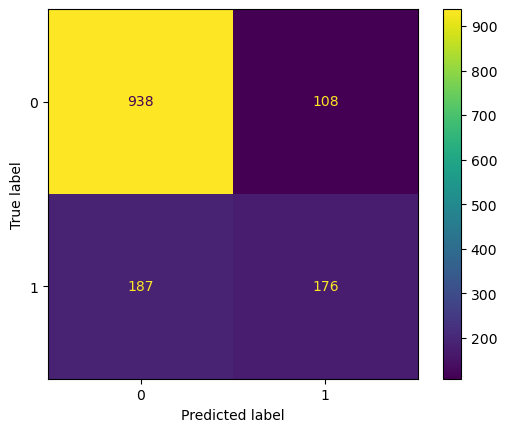

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay


def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)
   
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")
    cm_display = ConfusionMatrixDisplay(confusion).plot()

get_clf_eval(Y_test, pred = preds, pred_proba_po = pred_probs)

In [94]:
result = pd.DataFrame(grid_model.cv_results_).sort_values(by="rank_test_score").head()
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__colsample_bytree,param_model__gamma,param_model__lambda,param_model__learning_rate,param_model__max_depth,param_model__scale_pos_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1071,0.124413,0.008726,0.011110,0.003051,0.921787,4,3,0.177093,3,1,{'model__colsample_bytree': 0.9217873434513902...,0.833333,0.817376,0.810284,0.789007,0.820604,0.838366,0.795737,0.822380,0.811723,0.799290,0.813810,0.015119,1
1560,0.148135,0.004779,0.010610,0.000917,0.582032,4,2,0.052234,4,1,{'model__colsample_bytree': 0.5820318162572222...,0.829787,0.815603,0.801418,0.790780,0.813499,0.831261,0.793961,0.824156,0.822380,0.802842,0.812569,0.013880,2
1380,0.160045,0.009156,0.012912,0.002429,0.582032,3,1,0.052234,4,1,{'model__colsample_bytree': 0.5820318162572222...,0.831560,0.815603,0.801418,0.790780,0.809947,0.827709,0.792185,0.827709,0.820604,0.801066,0.811858,0.014288,3
1065,0.164149,0.009519,0.011611,0.001687,0.921787,4,3,0.052234,4,1,{'model__colsample_bytree': 0.9217873434513902...,0.836879,0.813830,0.804965,0.789007,0.815275,0.831261,0.783304,0.820604,0.813499,0.808171,0.811679,0.015798,4
1425,0.160946,0.004560,0.011711,0.002688,0.582032,3,2,0.052234,4,1,{'model__colsample_bytree': 0.5820318162572222...,0.831560,0.815603,0.799645,0.794326,0.815275,0.827709,0.788632,0.820604,0.824156,0.797513,0.811502,0.014468,5


In [95]:
model_dt = best_model.named_steps["model"]
model_dt

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9217873434513902, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=3,
              learning_rate=0.1770931987722763, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [96]:
preprocessor.fit(X_train) # 훈련
h_columns = preprocessor.named_transformers_['cat'].get_feature_names_out() # one-hot 인코딩된 특성 이름 추출

h_columns

array(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'Payment

In [97]:
model_dt.feature_importances_

array([0.03338705, 0.01360206, 0.01939061, 0.        , 0.        ,
       0.        , 0.        , 0.00821603, 0.        , 0.        ,
       0.        , 0.01404143, 0.        , 0.017281  , 0.        ,
       0.10934894, 0.        , 0.07458497, 0.        , 0.        ,
       0.00911192, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05040014, 0.        , 0.        , 0.        ,
       0.        , 0.01053624, 0.        , 0.        , 0.02141618,
       0.4768375 , 0.01583317, 0.03151394, 0.0201804 , 0.01003562,
       0.        , 0.        , 0.04808833, 0.        , 0.00800094,
       0.00819353], dtype=float32)

In [98]:
lin_reg.named_steps["preporcessor"].get_feature_names_out()

array(['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges',
       'cat__gender_Female', 'cat__gender_Male', 'cat__Partner_No',
       'cat__Partner_Yes', 'cat__Dependents_No', 'cat__Dependents_Yes',
       'cat__PhoneService_No', 'cat__PhoneService_Yes',
       'cat__MultipleLines_No', 'cat__MultipleLines_No phone service',
       'cat__MultipleLines_Yes', 'cat__InternetService_DSL',
       'cat__InternetService_Fiber optic', 'cat__InternetService_No',
       'cat__OnlineSecurity_No',
       'cat__OnlineSecurity_No internet service',
       'cat__OnlineSecurity_Yes', 'cat__OnlineBackup_No',
       'cat__OnlineBackup_No internet service', 'cat__OnlineBackup_Yes',
       'cat__DeviceProtection_No',
       'cat__DeviceProtection_No internet service',
       'cat__DeviceProtection_Yes', 'cat__TechSupport_No',
       'cat__TechSupport_No internet service', 'cat__TechSupport_Yes',
       'cat__StreamingTV_No', 'cat__StreamingTV_No internet service',
       'cat__StreamingTV_Yes', 'cat

In [99]:
model_dt.get_booster().get_fscore()

{'f0': 33.0,
 'f1': 26.0,
 'f2': 20.0,
 'f7': 2.0,
 'f11': 5.0,
 'f13': 1.0,
 'f15': 6.0,
 'f17': 7.0,
 'f20': 5.0,
 'f26': 5.0,
 'f31': 3.0,
 'f34': 5.0,
 'f35': 8.0,
 'f36': 8.0,
 'f37': 7.0,
 'f38': 4.0,
 'f39': 2.0,
 'f42': 8.0,
 'f44': 1.0,
 'f45': 2.0}

In [100]:
b = pd.DataFrame()
b['name'] = lin_reg.named_steps["preporcessor"].get_feature_names_out()
b['value'] = model_dt.feature_importances_
b

,name,value
0,num__tenure,0.033387
1,num__MonthlyCharges,0.013602
2,num__TotalCharges,0.019391
3,cat__gender_Female,0.000000
4,cat__gender_Male,0.000000
5,cat__Partner_No,0.000000
6,cat__Partner_Yes,0.000000
7,cat__Dependents_No,0.008216
8,cat__Dependents_Yes,0.000000
9,cat__PhoneService_No,0.000000


In [101]:
var_f1 = model_dt.get_booster().get_fscore()
var_f1['f4'] =0
var_f1['f10'] =0
var_f1['f12'] =0
var_f1['f16'] =0
var_f1['f21'] =0
var_f1['f24'] =0
var_f1['f25'] =0
var_f1['f27'] =0
var_f1['f30'] =0
var_f1['f33'] =0
var_f1['f40'] =0
var_f1['f41'] =0
var_f1['f43'] =0

var_f1 = pd.DataFrame.from_dict(var_f1, orient='index')
var_f1.index.name = 'F'
var_f1.reset_index(inplace=True)
var_f1['F'] = var_f1['F'].str.split('f', n=2, expand=True)[1].astype(int)
var_f1.set_index('F', inplace=True)
var_f1.sort_index(ascending=True, inplace=True)
var_f1

,0
F,
0,33.0
1,26.0
2,20.0
4,0.0
7,2.0
10,0.0
11,5.0
12,0.0
13,1.0


In [102]:
featue_im = pd.concat([b,var_f1], axis=1)
featue_im.rename(columns={0:'F1_score'}, inplace=True)
featue_im_sort = featue_im.sort_values('F1_score', ascending= False)
featue_im_sort

,name,value,F1_score
0,num__tenure,0.033387,33.0
1,num__MonthlyCharges,0.013602,26.0
2,num__TotalCharges,0.019391,20.0
42,cat__PaymentMethod_Electronic check,0.048088,8.0
36,cat__Contract_One year,0.015833,8.0
35,cat__Contract_Month-to-month,0.476837,8.0
17,cat__OnlineSecurity_No,0.074585,7.0
37,cat__Contract_Two year,0.031514,7.0
15,cat__InternetService_Fiber optic,0.109349,6.0
34,cat__StreamingMovies_Yes,0.021416,5.0


<Axes: xlabel='F1_score', ylabel='name'>

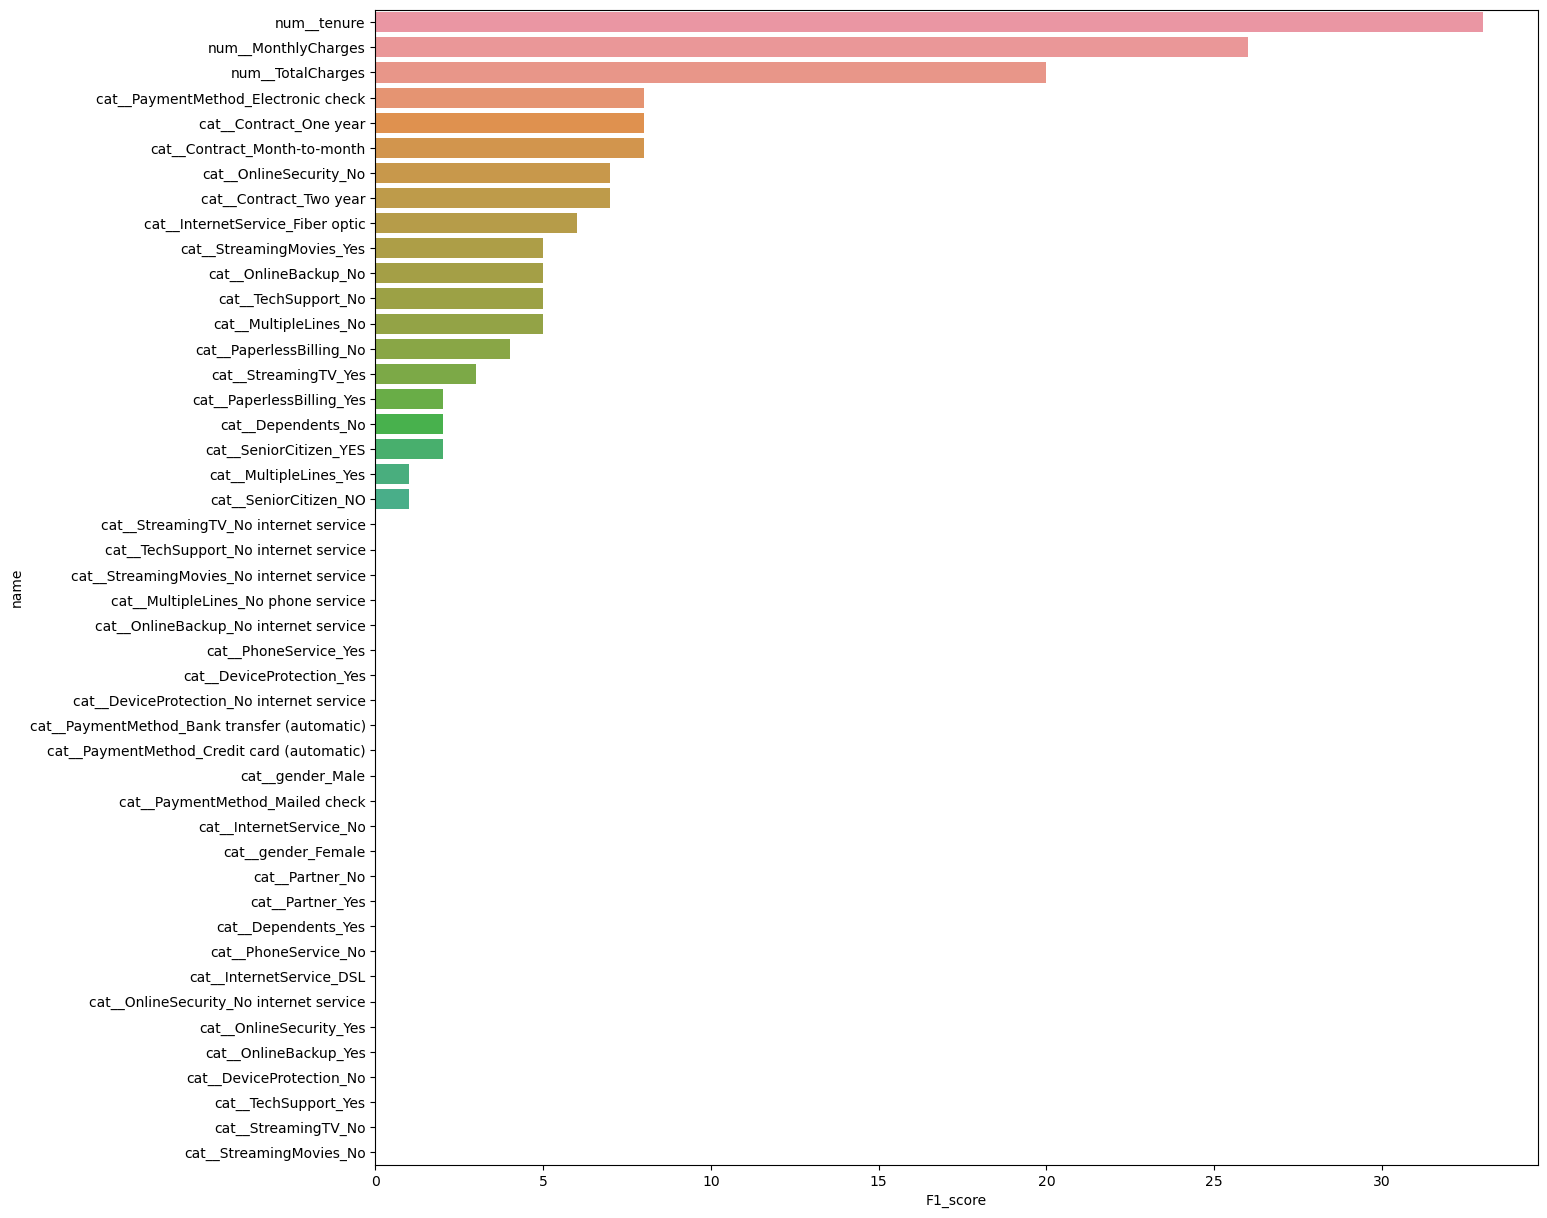

In [103]:
plt.figure(figsize=(15,15))
sns.barplot(data= featue_im_sort, x='F1_score', y='name')